<a href="https://colab.research.google.com/github/Loijz/Loijz/blob/main/presentation_m10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boombox exercise

In [2]:
!pip install linearmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from linearmodels.panel import PanelOLS

# Set up modern styling
sns.set_theme(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00


In [3]:
# Load and prepare data

file_path = 'https://www.dropbox.com/scl/fi/6hvfnl04zwik484zm3n2r/boombox.csv?rlkey=kxyggs1y03d56g5q7qd3pdknj&dl=1'
#file_path = 'https://www.dropbox.com/scl/fi/g4krz1pi4lnrmy616pu0q/boombox_start.csv?rlkey=pwdiqs5bemkpvksv2fsxjisgk&dl=1'

# Load the data
try:
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin-1')

df.head()

,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,country,week,curators,ib_curators,artists,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists
0,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w23,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w33,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w41,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w42,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w45,0,0,0,0,0,0,0,0


In [4]:
list(df.columns)

['curators_earned',
 'ib_curators_earned',
 'artists_earned',
 'ib_artists_earned',
 'active_artists_earned',
 'ib_active_artists_earned',
 'inactive_artists_earned',
 'ib_inactive_artists_earned',
 'curators_other',
 'ib_curators_other',
 'artists_other',
 'ib_artists_other',
 'active_artists_other',
 'ib_active_artists_other',
 'inactive_artists_other',
 'ib_inactive_artists_other',
 'curators_owned',
 'ib_curators_owned',
 'artists_owned',
 'ib_artists_owned',
 'active_artists_owned',
 'ib_active_artists_owned',
 'inactive_artists_owned',
 'ib_inactive_artists_owned',
 'curators_paid',
 'ib_curators_paid',
 'artists_paid',
 'ib_artists_paid',
 'active_artists_paid',
 'ib_active_artists_paid',
 'inactive_artists_paid',
 'ib_inactive_artists_paid',
 'country',
 'week',
 'curators',
 'ib_curators',
 'artists',
 'ib_artists',
 'active_artists',
 'ib_active_artists',
 'inactive_artists',
 'ib_inactive_artists']

In [5]:
len(df.columns)

42

In [6]:
# Convert week format (2019w33) to datetime
def convert_week_to_date(week_str):
    year = int(week_str[:4])
    week_num = int(week_str[5:])
    return pd.to_datetime(f"{year}-01-01") + pd.Timedelta(weeks=week_num-1)

# Apply conversion and create additional time-related columns
df['date'] = df['week'].apply(convert_week_to_date)
df['year'] = df['date'].dt.year
df['week_num'] = df['date'].dt.isocalendar().week

# Sort the dataframe by date
df = df.sort_values('date')

# Create a numeric week column for plotting
df['week_numeric'] = range(len(df))

df.head()


,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,artists,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists,date,year,week_num,week_numeric
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,0
17280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,1
3840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,2
17400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,3
3720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,4


In [7]:
len(df.columns)

46

In [8]:
df

,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,artists,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists,date,year,week_num,week_numeric
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,0
17280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,1
3840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,2
17400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,3
3720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2019-06-04,2019,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,0,0,0,3,0,0,0,3,0,0,...,1,7,1,1,0,6,2022-06-25,2022,25,21235
7319,0,0,0,4,0,0,0,4,0,0,...,0,18,0,3,0,15,2022-06-25,2022,25,21236
18599,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,2022-06-25,2022,25,21237
9479,0,2,1,19,0,1,1,18,0,0,...,1,73,0,1,1,72,2022-06-25,2022,25,21238


In [9]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of rows: {len(df)}")
print(f"Number of unique countries: {df['country'].nunique()}")
print(f"Date range: from {df['date'].min()} to {df['date'].max()}")
df.describe()

Dataset Overview:
Number of rows: 21240
Number of unique countries: 177
Date range: from 2019-06-04 00:00:00 to 2022-06-25 00:00:00


,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,artists,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists,date,year,week_num,week_numeric
count,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.00000,21240.000000,...,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240,21240.000000,21240.0,21240.000000
mean,0.174953,8.201036,0.750989,15.491902,0.233992,5.133051,0.516996,10.358851,0.02806,1.592891,...,2.457627,47.829944,0.553814,13.203484,1.903814,34.626460,2021-04-19 00:23:59.999999744,2020.808333,26.7,10619.500000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-06-04 00:00:00,2019.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-10-05 06:00:00,2020.000000,14.0,5309.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-05-03 12:00:00,2021.000000,26.0,10619.500000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,2021-11-27 18:00:00,2021.000000,40.25,15929.250000
max,27.000000,768.000000,175.000000,4336.000000,72.000000,1647.000000,107.000000,2689.000000,7.00000,137.000000,...,783.000000,14090.000000,121.000000,4175.000000,683.000000,11018.000000,2022-06-25 00:00:00,2022.000000,53.0,21239.000000
std,0.993312,45.607938,6.393790,149.178892,2.175014,53.848055,4.393279,96.457748,0.24638,8.225181,...,23.402460,479.825108,4.919123,138.718693,19.034774,347.564425,NaN,0.839621,15.111389,6131.604195


In [10]:
# Step 1: Create Classification Columns
def classify_marketing(row):
    if row['curators_earned'] + row['artists_earned'] > 0:
        return 'pull'
    elif row['curators_paid'] + row['artists_paid'] > 0:
        return 'push'
    else:
        return 'other'

df['marketing_type'] = df.apply(classify_marketing, axis=1)

In [11]:
df.head()

,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists,date,year,week_num,week_numeric,marketing_type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2019-06-04,2019,23,0,other
17280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2019-06-04,2019,23,1,other
3840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2019-06-04,2019,23,2,other
17400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2019-06-04,2019,23,3,other
3720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2019-06-04,2019,23,4,other


In [12]:
# Step 2: Proceed with Descriptive and Regression Analysis
# Segment data for pull and push marketing
pull_data = df[df['marketing_type'] == 'pull']
push_data = df[df['marketing_type'] == 'push']

In [13]:
push_data.head()

,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists,date,year,week_num,week_numeric,marketing_type
7997,0,0,0,0,0,0,0,0,0,0,...,3,0,0,2,3,2021-09-03,2021,35,13649,push
2598,0,0,0,1,0,0,0,1,0,0,...,2,0,0,1,2,2021-09-10,2021,36,13856,push
7999,0,1,0,0,0,0,0,0,0,0,...,4,0,0,1,4,2021-09-17,2021,37,14022,push
9439,0,1,0,0,0,0,0,0,0,0,...,7,0,0,3,7,2021-09-17,2021,37,14100,push
21080,0,6,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2021-09-24,2021,38,14262,push


In [14]:
print(f"Number of rows pull_data dataframe: {len(pull_data)}")
print(f"Number of rows push_data dataframe: {len(push_data)}")
print(f"Number of rows original dataframe: {len(df)}")

Number of rows pull_data dataframe: 2856
Number of rows push_data dataframe: 349
Number of rows original dataframe: 21240


In [15]:
# Descriptive statistics for pull marketing
print("Pull Marketing Descriptive Stats:")
print(pull_data.describe())

Pull Marketing Descriptive Stats:
       curators_earned  ib_curators_earned  artists_earned  ib_artists_earned  \
count      2856.000000         2856.000000     2856.000000        2856.000000   
mean          1.301120           53.556723        5.585084         107.935924   
min           0.000000            0.000000        0.000000           0.000000   
25%           0.000000            2.000000        0.000000           2.000000   
50%           0.000000           10.000000        1.000000          10.000000   
75%           1.000000           38.000000        3.000000          40.000000   
max          27.000000          768.000000      175.000000        4336.000000   
std           2.423689          113.782951       16.646666         394.391647   

       active_artists_earned  ib_active_artists_earned  \
count            2856.000000               2856.000000   
mean                1.740196                 36.514706   
min                 0.000000                  0.000000   
25% 

In [16]:
# Descriptive statistics for push marketing
print("\nPush Marketing Descriptive Stats:")
print(push_data.describe())


Push Marketing Descriptive Stats:
       curators_earned  ib_curators_earned  artists_earned  ib_artists_earned  \
count            349.0          349.000000           349.0         349.000000   
mean               0.0            4.472779             0.0          11.865330   
min                0.0            0.000000             0.0           0.000000   
25%                0.0            0.000000             0.0           3.000000   
50%                0.0            2.000000             0.0           7.000000   
75%                0.0            6.000000             0.0          15.000000   
max                0.0           35.000000             0.0         142.000000   
std                0.0            6.027473             0.0          15.553086   

       active_artists_earned  ib_active_artists_earned  \
count                  349.0                349.000000   
mean                     0.0                  2.303725   
min                      0.0                  0.000000   
25%

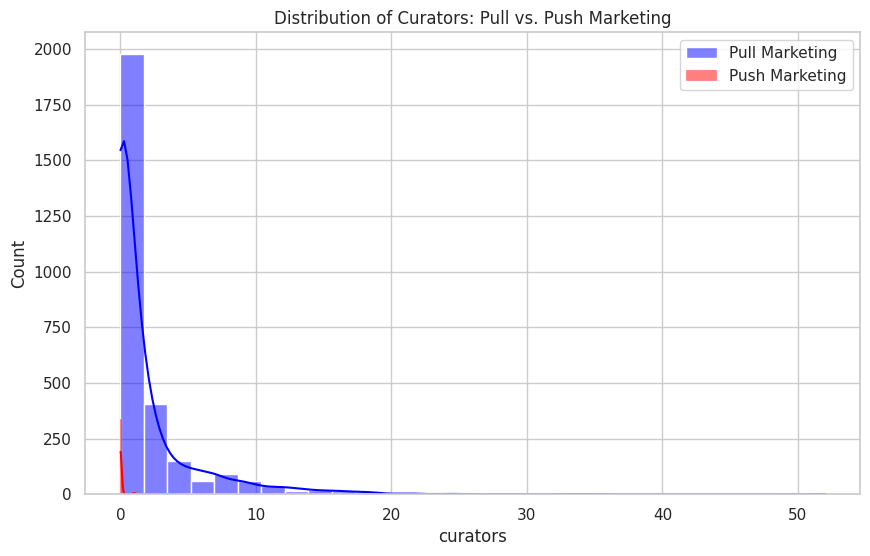

In [17]:
# Visualize key metrics using 'curators' as an example
plt.figure(figsize=(10, 6))
sns.histplot(pull_data['curators'], bins=30, kde=True, color='blue', label='Pull Marketing')
sns.histplot(push_data['curators'], bins=30, kde=True, color='red', label='Push Marketing')
plt.legend()
plt.title('Distribution of Curators: Pull vs. Push Marketing')
plt.show()

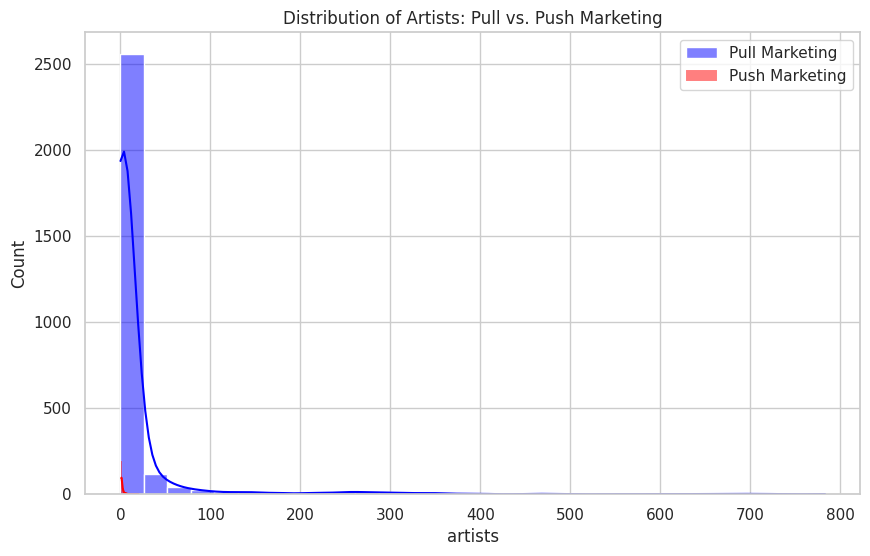

In [18]:
# Histograms for artists
plt.figure(figsize=(10, 6))
sns.histplot(pull_data['artists'], bins=30, kde=True, color='blue', label='Pull Marketing')
sns.histplot(push_data['artists'], bins=30, kde=True, color='red', label='Push Marketing')
plt.legend()
plt.title('Distribution of Artists: Pull vs. Push Marketing')
plt.show()

In [19]:
# Step 3: Regression Analysis
from statsmodels.formula.api import ols

# Pull marketing data
pull_data = df[df['marketing_type'] == 'pull']

# Regression analysis for pull marketing
pull_model = ols('curators ~ ib_artists + ib_curators', data=pull_data).fit()
print("Regression Results - Pull Marketing:")
print(pull_model.summary())

Regression Results - Pull Marketing:
                            OLS Regression Results                            
Dep. Variable:               curators   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1255.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:01:25   Log-Likelihood:                -6796.4
No. Observations:                2856   AIC:                         1.360e+04
Df Residuals:                    2853   BIC:                         1.362e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    

In [20]:
# Regression analysis for pull marketing (artists)
pull_model_artists = ols('artists ~ ib_artists + ib_curators', data=pull_data).fit()
print("Regression Results - Pull Marketing (Artists):")
print(pull_model_artists.summary())

Regression Results - Pull Marketing (Artists):
                            OLS Regression Results                            
Dep. Variable:                artists   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     7892.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:02:35   Log-Likelihood:                -13147.
No. Observations:                2856   AIC:                         2.630e+04
Df Residuals:                    2853   BIC:                         2.632e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Int

In [21]:
# Push marketing data
push_data = df[df['marketing_type'] == 'push']

In [22]:
# Regression analysis for push marketing
push_model = ols('curators ~ ib_artists + ib_curators', data=push_data).fit()
print("\nRegression Results - Push Marketing:")
print(push_model.summary())


Regression Results - Push Marketing:
                            OLS Regression Results                            
Dep. Variable:               curators   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     11.50
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.47e-05
Time:                        12:03:07   Log-Likelihood:                -67.979
No. Observations:                 349   AIC:                             142.0
Df Residuals:                     346   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   

In [25]:
# Regression analysis for push marketing (artists)
push_model_artists = ols('artists ~ ib_artists + ib_curators', data=push_data).fit()
print("Regression Results - Push Marketing (Artists):")
print(push_model_artists.summary())

Regression Results - Push Marketing (Artists):
                            OLS Regression Results                            
Dep. Variable:                artists   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     141.1
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.58e-45
Time:                        12:05:03   Log-Likelihood:                -596.64
No. Observations:                 349   AIC:                             1199.
Df Residuals:                     346   BIC:                             1211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Int

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and p-values
pull_coefs = pull_model.params
push_coefs = push_model.params
pull_pvalues = pull_model.pvalues
push_pvalues = push_model.pvalues

# Create DataFrames
results_df = pd.DataFrame({
    'Variable': pull_coefs.index,
    'Pull_Coefficient': pull_coefs.values,
    'Pull_pvalue': pull_pvalues.values,
    'Push_Coefficient': push_coefs.values,
    'Push_pvalue': push_pvalues.values
})

In [27]:
# Filter out the intercept for a clearer chart
results_df = results_df[results_df['Variable'] != 'Intercept']

In [28]:
# Create a long-form DataFrame for plotting
results_long = results_df.melt(id_vars='Variable', value_vars=['Pull_Coefficient', 'Push_Coefficient'],
                               var_name='Type', value_name='Coefficient')

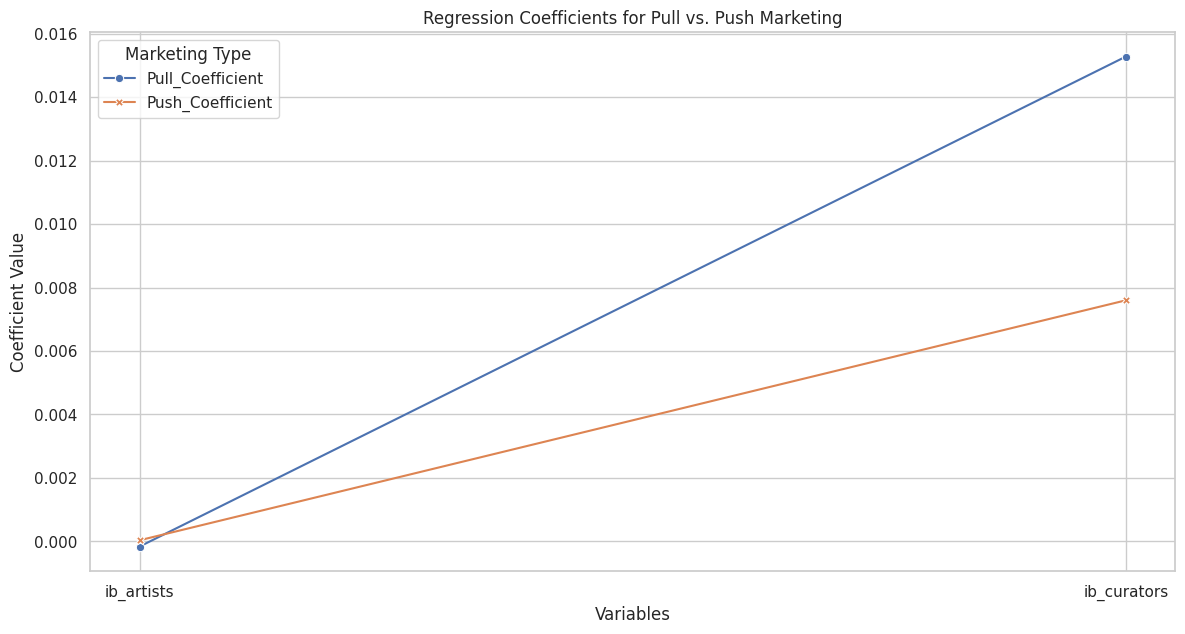

In [29]:
# Plot the coefficients
plt.figure(figsize=(14, 7))
sns.lineplot(x='Variable', y='Coefficient', hue='Type', style='Type', data=results_long, markers=True, dashes=False)
plt.title('Regression Coefficients for Pull vs. Push Marketing')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.legend(title='Marketing Type')
plt.grid(True)
plt.show()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Simulated Data: Adjust according to your actual data
time = pd.date_range(start='2020-07-01', periods=24, freq='ME')
actual = np.random.rand(24) + 1
without_paid = actual - 0.2
without_earned = actual - 0.4
without_owned = actual - 0.3

In [33]:
# Create DataFrame
data = pd.DataFrame({
    'Time': time,
    'Actual': actual,
    'Without_Paid': without_paid,
    'Without_Earned': without_earned,
    'Without_Owned': without_owned
})

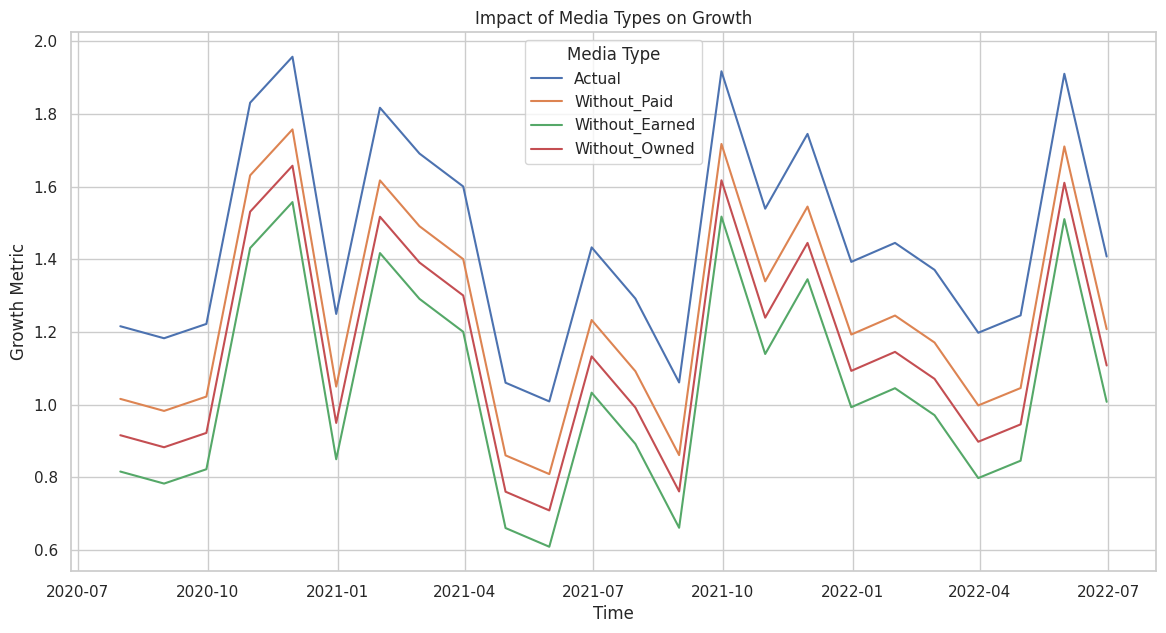

In [34]:
# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='Time', y='value', hue='variable',
             data=pd.melt(data, ['Time']),
             markers=True, dashes=False)
plt.title('Impact of Media Types on Growth')
plt.xlabel('Time')
plt.ylabel('Growth Metric')
plt.legend(title='Media Type')
plt.grid(True)
plt.show()